## Experiments implementing Gradient Descent on Python

Importing libraries

In [1]:
import numpy as np

Initializing X random integer vector

In [2]:
x_100 = np.random.randint(1050, size=100)

Initializing Y vector based on $Y = X * 2 + 200$

In [3]:
y_100 = x_100 * 2 + 200

## Gradient Descent Function

This gradient descent function was implemented based on fast.ai Excel Spreadsheet.

In [ ]:
def gradient_descent(x_arr, y_arr, step, lr, x0 = 0, x1 = 0):
    # Initializes Mean Squared Error List
    mse_list = []
    for x, y in zip(x_arr, y_arr):
        # Make prediction for a value of x
        prediction = x0 + x1 * x
        
        # Calculates Mean Squared Error
        mse = (y - prediction) ** 2
        
        # Calculates error for small increments in x0        
        err_x0 = ((x0 + step + x1 * x) - y)**2
        
        # Calculates error for small increments in x1
        err_x1 = ((x0 + (x1 + step) * x) - y)**2
        
        # Calculates how much the error changes by the small increment in x0        
        dx0 = (err_x0 - mse) / step
        
        # Calculates how much the error changes by the small increment in x1        
        dx1 = (err_x1 - mse) / step
        
        # Sets up new values for x0 and x1
        x0 -= dx0 * lr  
        x1 -= dx1 * lr
        
        # Appends Mean Squared Error to list
        mse_list.append(mse)
        
    # Calculates the Root Mean Squared Error for the whole cycle
    rmse = sum(mse_list)**1/2
    
    # Returns Values        
    return x0, x1, rmse

## Choosing Learning Rate

Importing pandas

In [9]:
import pandas as pd

Testing a bunch of learning rates.

In [21]:
rmse_list = []
for i in range(5,15):
    x, y = 0, 0
    for i in range(0, 1):
        x, y, rmse = gradient_descent(x_100, y_100, 0.01, 1/10**i, x, y)
    rmse_list.append(rmse)

Checking which is the small learning rate, that provess to be 10 * 0.06

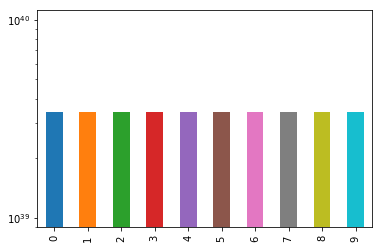

In [22]:
pd.Series(rmse_list).plot.bar(logy=True)